bowtie2 -p 4 --very-fast --no-unal -x /data/hg19/hg19 -U /data/lab6/illumina_reads.fastq -S outputR-H.sam --un unaligned.fastq

**When I ran bowtie2, I used the human genome as the database, and I used the reads from the sequencing run as the input reads.**

**The --un unaligned.fastq file will contain all the non-contaminated DNA of S. oneidensis.**

**Output after running bowtie2:**
1124714 reads; of these:

  1124714 (100.00%) were unpaired; of these:
  
    1028379 (91.43%) aligned 0 times
    
    87274 (7.76%) aligned exactly 1 time
    
    9061 (0.81%) aligned >1 times
    
8.57% overall alignment rate

**So 8.57% of the sequencing library came from contaminating human DNA.**


bowtie2 -p 4 --very-fast --no-unal -x /data/lab6/shewanella_oneidensis_mr-1 -U unaligned.fastq -S outputU-SO.sam --un unaligned_afterU-SO.fastq

**The --un unaligned_afterU-SO.fastq file contains all the remaining, unmatched DNA sequences**

**output after running bowtie2:**
1028379 reads; of these:

  1028379 (100.00%) were unpaired; of these:
  
    299560 (29.13%) aligned 0 times
    
    687571 (66.86%) aligned exactly 1 time
    
    41248 (4.01%) aligned >1 times
    
70.87% overall alignment rate

**29.13% of the filtered library did not align to the reference genome. After using the setting --very-sensitive, 28.99% of the filtered library did not align to the reference genome. The --very-sensitive feature only aligned .14% more of the sequences**

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import csv

In [27]:
depthU_so=open('depthU-so.tab')
chromo=[]
position=[]
depthcoverage=[]
with open('depthU-so.tab') as depth_file:
    depth=csv.reader(depth_file, delimiter='\t')
    for row in depth:
        chromo.append(row[0])
        position.append(row[1])
        depthcoverage.append(row[2])

In [128]:
chromo[4498850]

'AE014299.2'

In [28]:
position_int=[]
depthcoverage_int=[]
for x in range(len(position)):
    position_int.append(int(position[x]))
    depthcoverage_int.append(int(depthcoverage[x]))

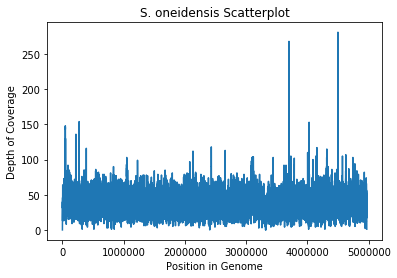

In [29]:
plt.plot(position_int,depthcoverage_int)
plt.xlabel('Position in Genome')
plt.ylabel('Depth of Coverage')
plt.title('S. oneidensis Scatterplot')
plt.show()

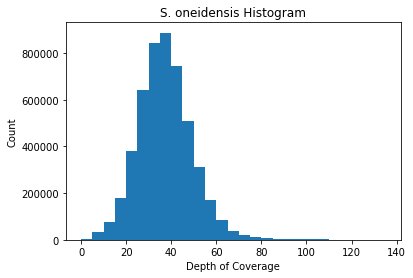

In [30]:
plt.hist(depthcoverage_int,bins=range(0,140,5))
plt.xlabel('Depth of Coverage')
plt.ylabel('Count')
plt.title('S. oneidensis Histogram')
plt.show()

In [31]:
import numpy as np
print(min(depthcoverage_int))
print(max(depthcoverage_int))
print(np.average(depthcoverage_int))

0
281
37.03830306625343


The min coverage is 0, the max coverage is 281, and the mean coverage is 37.0383.

# Extra Credit 1

In [32]:
hu_chromo=[]
hu_position=[]
hu_depthcoverage=[]
with open('R-H.tab') as hu_depth_file:
    hu_depth=csv.reader(hu_depth_file, delimiter='\t')
    for row in hu_depth:
        hu_chromo.append(row[0])
        hu_position.append(row[1])
        hu_depthcoverage.append(row[2])

In [43]:
hu_position_int=[]
hu_depthcoverage_int=[]
for x in range(len(hu_position)):
    hu_position_int.append(int(hu_position[x]))
    hu_depthcoverage_int.append(int(hu_depthcoverage[x]))

In [52]:
output = []
for chro in hu_chromo:
    if chro not in output:
        output.append(chro)
print(output)

['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX', 'chrY', 'chr1_gl000191_random', 'chr1_gl000192_random', 'chr4_gl000193_random', 'chr4_gl000194_random', 'chr9_gl000199_random', 'chr9_gl000200_random', 'chr9_gl000201_random', 'chr11_gl000202_random', 'chrUn_gl000213', 'chrUn_gl000214', 'chrUn_gl000215', 'chrUn_gl000217', 'chrUn_gl000222', 'chrUn_gl000223', 'chrUn_gl000226', 'chrUn_gl000227', 'chrUn_gl000228', 'chrUn_gl000233', 'chrUn_gl000245', 'chrUn_gl000247']


In [70]:
chrm=np.zeros((24,2)) #first column is depth, second column is length of chr
for x in range(len(hu_chromo)):
    if hu_chromo[x]=='chr1':
        chrm[0,0]=chrm[0,0]+hu_depthcoverage_int[x]
        chrm[0,1]=chrm[0,1]+1
    elif hu_chromo[x]=='chr2':
        chrm[1,0]=chrm[1,0]+hu_depthcoverage_int[x]
        chrm[1,1]=chrm[1,1]+1
    elif hu_chromo[x]=='chr3':
        chrm[2,0]=chrm[2,0]+hu_depthcoverage_int[x]
        chrm[2,1]=chrm[2,1]+1    
    elif hu_chromo[x]=='chr4':
        chrm[3,0]=chrm[3,0]+hu_depthcoverage_int[x]
        chrm[3,1]=chrm[3,1]+1
    elif hu_chromo[x]=='chr5':
        chrm[4,0]=chrm[4,0]+hu_depthcoverage_int[x]
        chrm[4,1]=chrm[4,1]+1
    elif hu_chromo[x]=='chr6':
        chrm[5,0]=chrm[5,0]+hu_depthcoverage_int[x]
        chrm[5,1]=chrm[5,1]+1
    elif hu_chromo[x]=='chr7':
        chrm[6,0]=chrm[6,0]+hu_depthcoverage_int[x]
        chrm[6,1]=chrm[6,1]+1
    elif hu_chromo[x]=='chr8':
        chrm[7,0]=chrm[7,0]+hu_depthcoverage_int[x]
        chrm[7,1]=chrm[7,1]+1
    elif hu_chromo[x]=='chr9':
        chrm[8,0]=chrm[8,0]+hu_depthcoverage_int[x]
        chrm[8,1]=chrm[8,1]+1
    elif hu_chromo[x]=='chr10':
        chrm[9,0]=chrm[9,0]+hu_depthcoverage_int[x]
        chrm[9,1]=chrm[9,1]+1
    elif hu_chromo[x]=='chr11':
        chrm[10,0]=chrm[10,0]+hu_depthcoverage_int[x]
        chrm[10,1]=chrm[10,1]+1
    elif hu_chromo[x]=='chr12':
        chrm[11,0]=chrm[11,0]+hu_depthcoverage_int[x]
        chrm[11,1]=chrm[11,1]+1
    elif hu_chromo[x]=='chr13':
        chrm[12,0]=chrm[12,0]+hu_depthcoverage_int[x]
        chrm[12,1]=chrm[12,1]+1
    elif hu_chromo[x]=='chr14':
        chrm[13,0]=chrm[13,0]+hu_depthcoverage_int[x]
        chrm[13,1]=chrm[13,1]+1
    elif hu_chromo[x]=='chr15':
        chrm[14,0]=chrm[14,0]+hu_depthcoverage_int[x]
        chrm[14,1]=chrm[14,1]+1
    elif hu_chromo[x]=='chr16':
        chrm[15,0]=chrm[15,0]+hu_depthcoverage_int[x]
        chrm[15,1]=chrm[15,1]+1
    elif hu_chromo[x]=='chr17':
        chrm[16,0]=chrm[16,0]+hu_depthcoverage_int[x]
        chrm[16,1]=chrm[16,1]+1
    elif hu_chromo[x]=='chr18':
        chrm[17,0]=chrm[17,0]+hu_depthcoverage_int[x]
        chrm[17,1]=chrm[17,1]+1
    elif hu_chromo[x]=='chr19':
        chrm[18,0]=chrm[18,0]+hu_depthcoverage_int[x]
        chrm[18,1]=chrm[18,1]+1
    elif hu_chromo[x]=='chr20':
        chrm[19,0]=chrm[19,0]+hu_depthcoverage_int[x]
        chrm[19,1]=chrm[19,1]+1
    elif hu_chromo[x]=='chr21':
        chrm[20,0]=chrm[20,0]+hu_depthcoverage_int[x]
        chrm[20,1]=chrm[20,1]+1
    elif hu_chromo[x]=='chr22':
        chrm[21,0]=chrm[21,0]+hu_depthcoverage_int[x]
        chrm[21,1]=chrm[21,1]+1
    elif hu_chromo[x]=='chrX':
        chrm[22,0]=chrm[22,0]+hu_depthcoverage_int[x]
        chrm[22,1]=chrm[22,1]+1
    elif hu_chromo[x]=='chrY':
        chrm[23,0]=chrm[23,0]+hu_depthcoverage_int[x]
        chrm[23,1]=chrm[23,1]+1

In [87]:
print(len(chrm))

24


In [72]:
chr_lengthNCBI=chrm
chr_lengthNCBI[0,1]=249250621
chr_lengthNCBI[1,1]=243199373
chr_lengthNCBI[2,1]=198022430
chr_lengthNCBI[3,1]=191154276
chr_lengthNCBI[4,1]=180915260
chr_lengthNCBI[5,1]=171115067
chr_lengthNCBI[6,1]=159138663
chr_lengthNCBI[7,1]=146364022
chr_lengthNCBI[8,1]=141213431
chr_lengthNCBI[9,1]=135534747
chr_lengthNCBI[10,1]=135006516
chr_lengthNCBI[11,1]=133851895
chr_lengthNCBI[12,1]=115169878
chr_lengthNCBI[13,1]=107349540
chr_lengthNCBI[14,1]=102531392
chr_lengthNCBI[15,1]=90354753
chr_lengthNCBI[16,1]=81195210
chr_lengthNCBI[17,1]=78077248
chr_lengthNCBI[18,1]=59128983
chr_lengthNCBI[19,1]=63025520
chr_lengthNCBI[20,1]=48129895
chr_lengthNCBI[21,1]=51304566
chr_lengthNCBI[22,1]=155270560
chr_lengthNCBI[23,1]=59373566

In [88]:
avgs=np.zeros(24)
for x in range(len(avgs)):
    avgs[x]=chr_lengthNCBI[x,0]/chr_lengthNCBI[x,1]

In [89]:
print(avgs)

[0.00911901 0.0099038  0.00993616 0.00991051 0.0099281  0.0098957
 0.0098526  0.00985916 0.0085452  0.00976778 0.00982173 0.00983894
 0.00839951 0.00829874 0.00805135 0.00882209 0.00969689 0.00966831
 0.00948393 0.00950786 0.00729187 0.00686824 0.00971504 0.00411781]


In [90]:
chr_names=output[0:24]

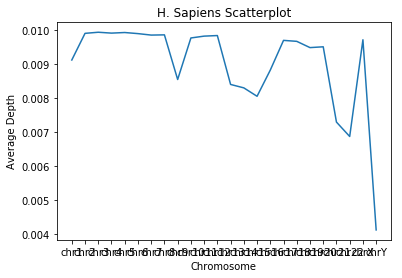

In [91]:
plt.plot(chr_names,avgs)
plt.xlabel('Chromosome')
plt.ylabel('Average Depth')
plt.title('H. Sapiens Scatterplot')
plt.show()

Jamie is most likely female, because the average depth of chromosome Y is signifantly lower than that of chromosome X and all the other chromosomes.

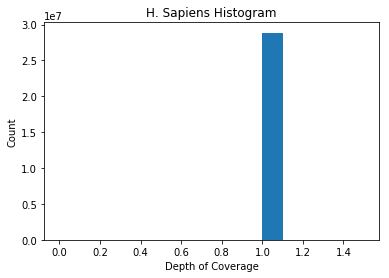

In [95]:
plt.hist(hu_depthcoverage_int,bins=[0,.1,.2,.3,.4,.5,.7,.8,.9,1,1.1,1.2,1.3,1.4,1.5])
plt.xlabel('Depth of Coverage')
plt.ylabel('Count')
plt.title('H. Sapiens Histogram')
plt.show()

# Extra Credit 2

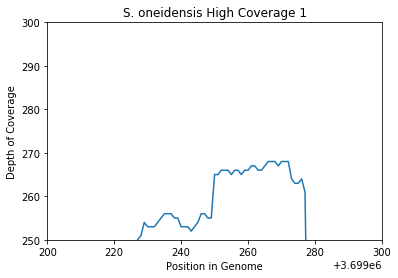

In [131]:
plt.plot(position_int,depthcoverage_int)
plt.xlabel('Position in Genome')
plt.ylabel('Depth of Coverage')
plt.title('S. oneidensis High Coverage 1')
plt.axis([3700000-800,3700000-700,250,300])
plt.show()

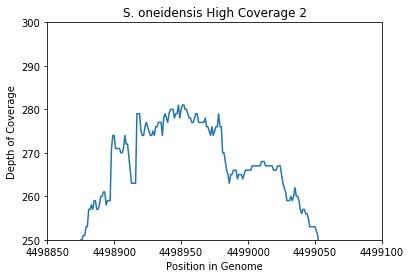

In [130]:
plt.plot(position_int,depthcoverage_int)
plt.xlabel('Position in Genome')
plt.ylabel('Depth of Coverage')
plt.title('S. oneidensis High Coverage 2')
plt.axis([4498850,4500000-900,250,300])
plt.show()

The gene at the High Coverage 1 is called tnpA, which codes for a ISSod13 transposase TnpA_ISSod13.

The gene at the High Coverage 2 is called bpfA, which codes for a biofilm promoting protein called bpfA.  